In [7]:
%matplotlib inline

import sys
import gym
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm_notebook as tqdm

from tf_agents.policies import random_tf_policy
from tf_agents.environments import tf_py_environment
from tf_agents.environments import gym_wrapper
from tf_agents.metrics import tf_metrics
from tf_agents.drivers import dynamic_step_driver

tf.compat.v1.enable_v2_behavior()

In [2]:
sys.path.append('/scr-ssd/ksrini/safemrl')
import envs

In [3]:
env = gym.make('MinitaurGoalVelocityEnv-v0')

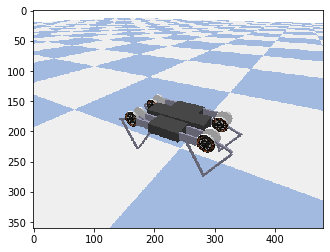

In [4]:
plt.imshow(env.render(mode='rgb_array'))

In [5]:
tf_env = tf_py_environment.TFPyEnvironment(gym_wrapper.GymWrapper(env))
policy = random_tf_policy.RandomTFPolicy(tf_env.time_step_spec(), tf_env.action_spec())
n_episodes = 100

In [9]:
metric = tf_metrics.AverageEpisodeLengthMetric()

AttributeError: 'google.protobuf.pyext._message.RepeatedCompositeCo' object has no attribute 'append'

In [8]:
traj_lens = []

for _ in tqdm(range(n_episodes)):
    traj_len = 0
    time_step = tf_env.reset()
    pol_state = policy.get_initial_state(1)
    while not time_step.is_last():
        action_step = policy.action(time_step, pol_state)
        action, pol_state = action_step.action, action_step.state
        time_step = tf_env.step(action)
        traj_len += 1
    traj_lens.append(traj_len)

W1016 16:30:45.630895 140246969870080 deprecation.py:323] From /scr1/.virtualenvs/tfagents/lib/python3.6/site-packages/tf_agents/specs/tensor_spec.py:295: SeedStream.__init__ (from tensorflow_probability.python.util.seed_stream) is deprecated and will be removed after 2019-10-01.
Instructions for updating:
SeedStream has moved to `tfp.util.SeedStream`.


KeyboardInterrupt: 